In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

In [65]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

### カテゴリカルデータと量的データを把握する

* カテゴリカルデータ

    * 名義尺度(nominal)： Survived, Sex

    * 順序尺度(ordinal)： Pclass
<br>
* 量的データ

    * 連続値(continuous): Age, Fare

    * 離散値(discrete): SibSp, Parch

### 混在したタイプのデータを把握する
* Tickets

    数値とアルファベットが混在

### エラーやタイポを含むデータを把握する

In [66]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [67]:
# Cabinは欠損値が多いので除外した方が良い

# 訓練データのnull数
print(train_df.isnull().sum())
print('_'*40)
# テストデータのnull数
print(test_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
________________________________________
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


### 変数の型を確認する
stringsはobjectで表示

In [68]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [69]:
test_df


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [70]:
# 8割弱の乗客が両親や子供、兄弟や配偶者と一緒に搭乗していなかった。（単身）
# Parch: 両親、子供の数
# SibSp: 兄弟、配偶者の数
pd.crosstab(train_df['SibSp'], train_df['Parch'], normalize='columns')

Parch,0,1,2,3,4,5,6
SibSp,,,,,,,
0,0.792035,0.322034,0.3625,0.2,0.25,0.4,0.0
1,0.181416,0.483051,0.2375,0.6,0.75,0.6,1.0
2,0.023599,0.059322,0.0500,0.2,0.00,0.0,0.0
3,0.002950,0.059322,0.0875,0.0,0.00,0.0,0.0
4,0.000000,0.076271,0.1125,0.0,0.00,0.0,0.0
5,0.000000,0.000000,0.0625,0.0,0.00,0.0,0.0
8,0.000000,0.000000,0.0875,0.0,0.00,0.0,0.0


In [71]:
train_df.describe()



,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


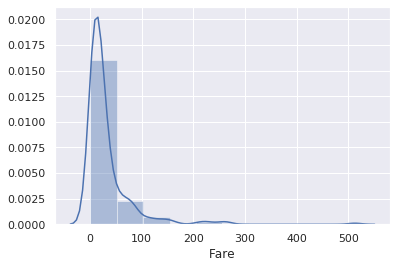

In [72]:
# Fareの分布
# 運賃については高い金額を払った人間が少ない
# 0-50が８割以上を占めている
sns.distplot(train_df['Fare'],
             kde=True, rug=False, bins=10)

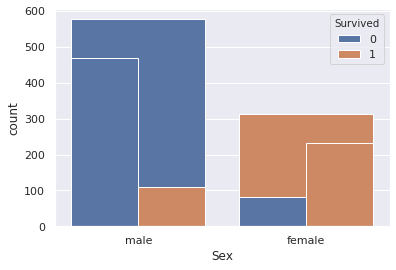

In [73]:
# Sexの分布
# 女性が生き残ったことが分かる
sns.countplot(train_df['Sex'])
sns.countplot(train_df['Sex'], hue=train_df['Survived'])

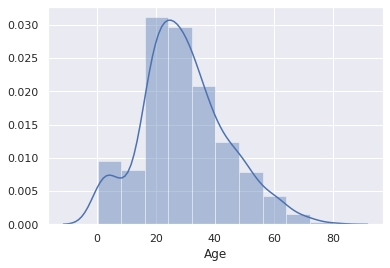

In [74]:
# そもそもの分布としてAgeは子供の部分で山がある
train_df_omit_age = train_df.dropna(subset=['Age'])
sns.distplot(train_df_omit_age['Age'],
             kde=True, rug=False, bins=10)

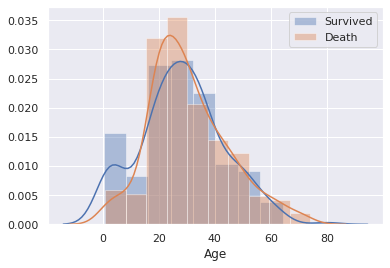

In [75]:
# 年齢による生存率は明らかに年齢の20歳より小さい人は生存している確率が
# 高いことは分かる
sns.distplot(train_df_omit_age[train_df_omit_age['Survived']==1]['Age'],
             kde=True, rug=False, bins=10, label='Survived')
sns.distplot(train_df_omit_age[train_df_omit_age['Survived']==0]['Age'],
             kde=True, rug=False, bins=10, label='Death')
plt.legend()

In [76]:
# 重複をチェック
train_df.describe(include=['O'])



,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,1601,B96 B98,S
freq,1,577,7,4,644
